Data Initial Exploration - Business Data

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os

In [2]:
def plotTopFreq(dat, var, top_n, title):
    #cat_data.categories
    Categories={}
    for cat in dat[var].values:
        #     print(cat)
        if cat != None:
            all_categories= cat.split(",")
            all_categories = [x.strip() for x in all_categories]
        for x in all_categories:
            try :
                Categories[x] =Categories[x]+1
            except:
                Categories[x]=1
    top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
    top_categories.reset_index(inplace=True)
    top_categories.columns = ['category', 'occurance']

    x_val=top_categories.sort_values("occurance")[::-1][:top_n].occurance.values
    labels=top_categories.sort_values("occurance")[::-1][:top_n].category.values
    series = pd.Series(x_val, index=labels, name=title)
    series.plot.pie(figsize=(10, 10),startangle=90)

Business Data preview

In [3]:
# load and preview the data
business_data = []
with open("datasets/yelp_academic_dataset_business.json", 'r', encoding='utf-8') as f:
    for line in f:
        business_data.append(json.loads(line))
business_df = pd.DataFrame.from_dict(business_data)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
#business_df = pd.read_json('datasets/yelp_academic_dataset_business.json', lines=True)
#business_df.head()

In [5]:
# "name" column name is ambiguous with df.name - change it
business_df = business_df.rename(columns = {'name': 'business_name'})

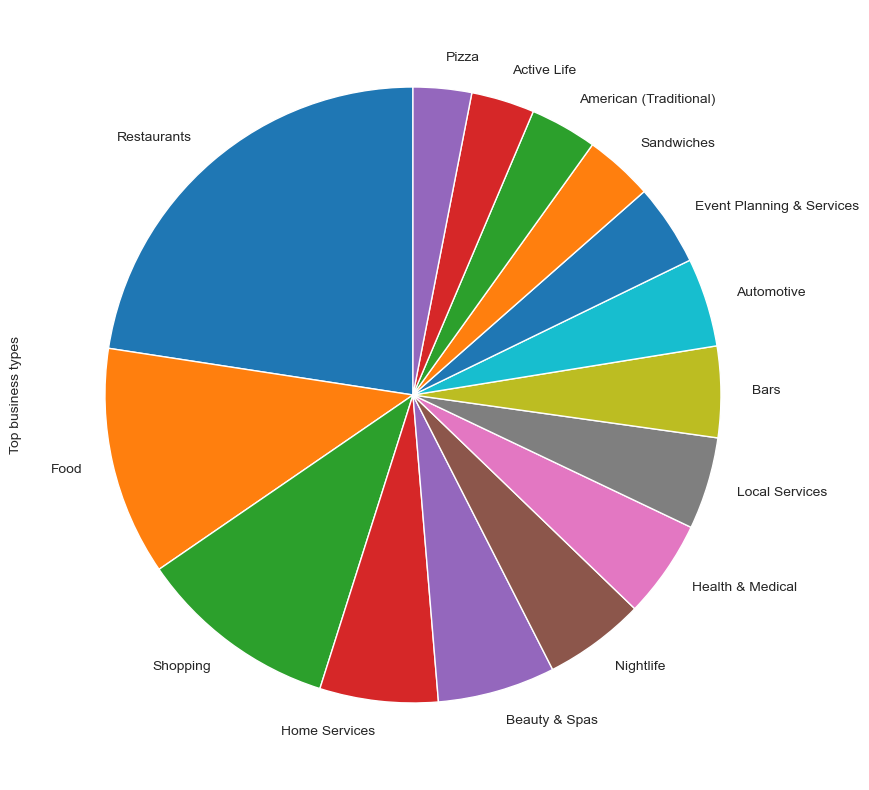

In [6]:
## Top 15 business ategories
plotTopFreq(business_df,"categories",15,"Top business types")

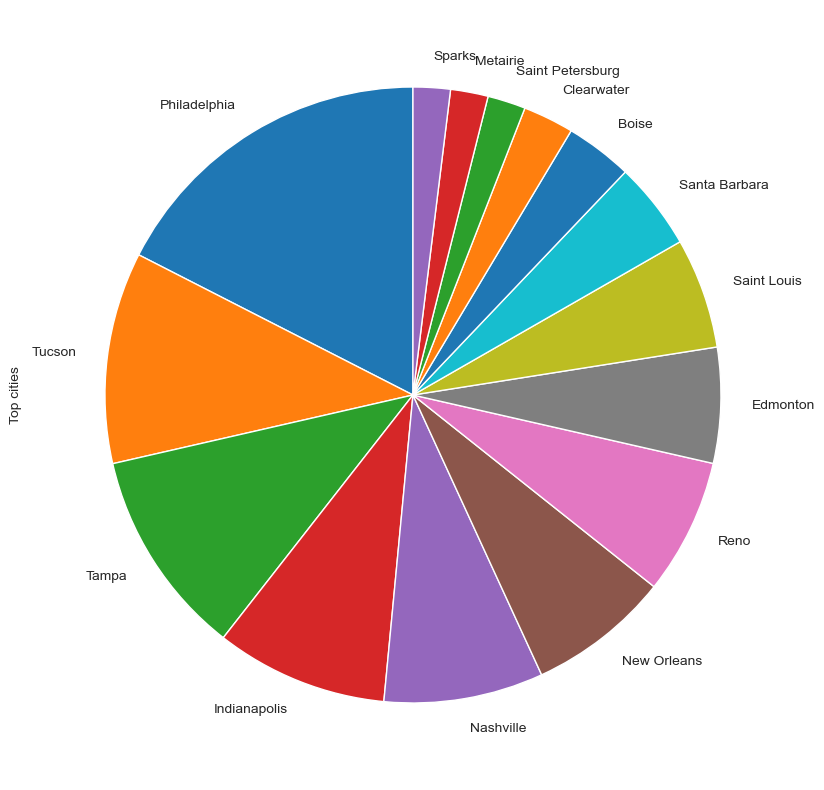

In [7]:
## top cities
plotTopFreq(business_df,"city",15,"Top cities")

Subset restaurants:

In [8]:
restaurants = (business_df["categories"].str.find("Restaurants")>=0)
bars = (business_df["categories"].str.find("Bars")>=0)
food = (business_df["categories"].str.find("Food")>=0)
food_restaurants_bar = [a or b or c for a, b,c in zip(restaurants, bars, food)]

In [9]:
restaurants.sum()

52268

In [10]:
np.sum(food_restaurants_bar)


66819

In [11]:
restaurants_bar = [a or b for a, b in zip(restaurants, bars)]
np.sum(restaurants_bar)

55663

We do not need to keep the business universe too broad, since that way the review matrix will be even more sparse. Instead we first only focus on "restaurants"

In [12]:
restaurants_df=business_df[restaurants]
print (restaurants_df.shape)
restaurants_df.head()

(52268, 14)


,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


Second, We focus on cities where the reviews per business is high

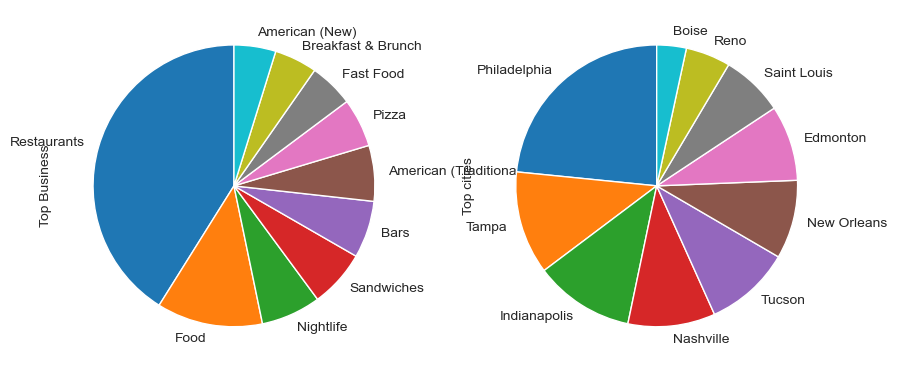

In [13]:
plt.subplot(1,2,1)
plotTopFreq(restaurants_df,"categories",10,"Top Business")
plt.subplot(1,2,2)
plotTopFreq(restaurants_df,"city",10,"Top cities")

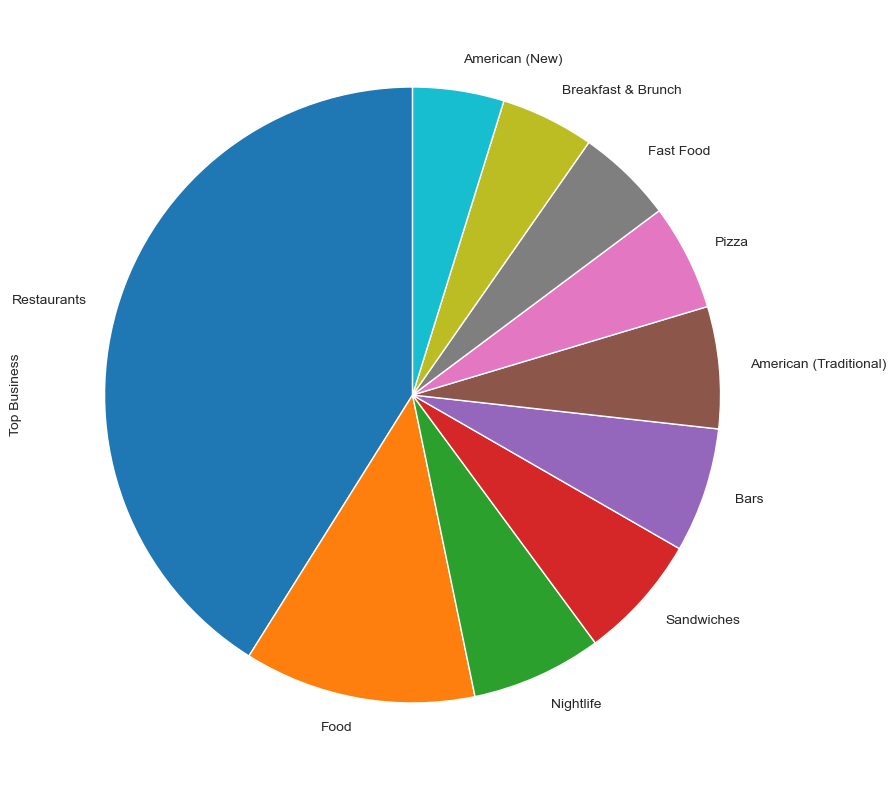

In [14]:
plotTopFreq(restaurants_df,"categories",10,"Top Business")

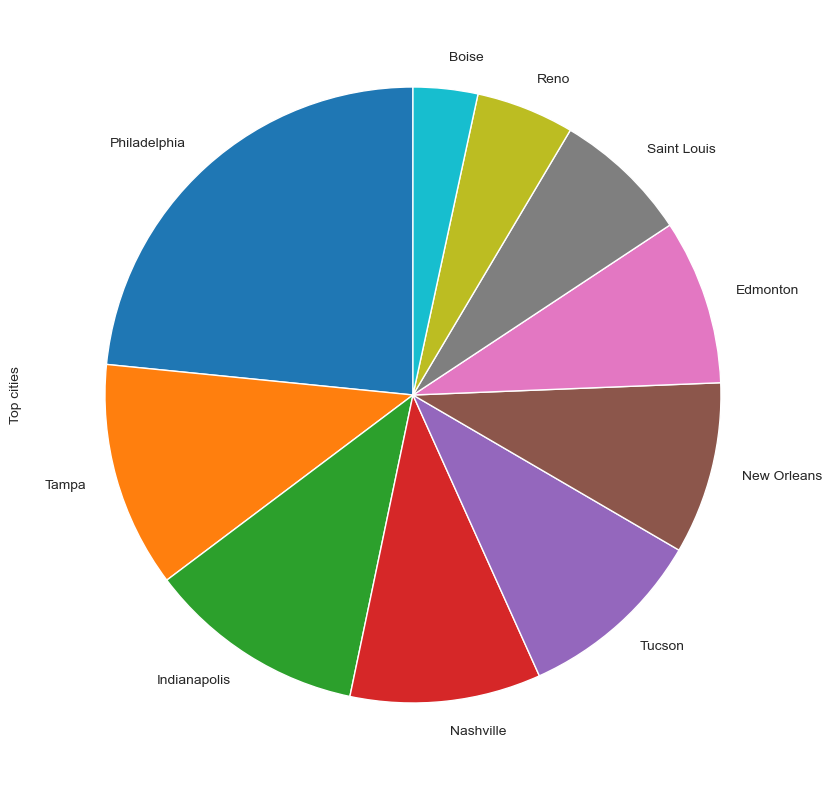

In [15]:
plotTopFreq(restaurants_df,"city",10,"Top cities")

Text(0.5, 1.0, 'top review counts')

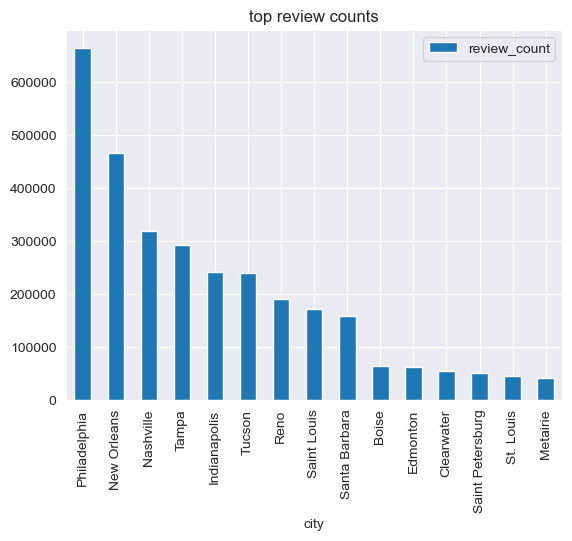

In [16]:
## restaurant review counts by city
review_count = restaurants_df.groupby("city", as_index=False)["review_count"].agg(sum).sort_values(by = "review_count", ascending = False)
top_reviews = review_count.iloc[:15]
top_reviews = top_reviews.set_index("city")
top_reviews.plot.bar()
plt.title("top review counts")

In [17]:
top_reviews

,review_count
city,
Philadelphia,665732
New Orleans,465982
Nashville,318548
Tampa,293122
Indianapolis,242024
Tucson,238851
Reno,191003
Saint Louis,171777
Santa Barbara,158247


In [18]:
top_reviews.iloc[:30].index.values

array(['Philadelphia', 'New Orleans', 'Nashville', 'Tampa',
       'Indianapolis', 'Tucson', 'Reno', 'Saint Louis', 'Santa Barbara',
       'Boise', 'Edmonton', 'Clearwater', 'Saint Petersburg', 'St. Louis',
       'Metairie'], dtype=object)

Text(0.5, 1.0, 'Median reviews per retaurants for those cities in top 15 by total reviews')

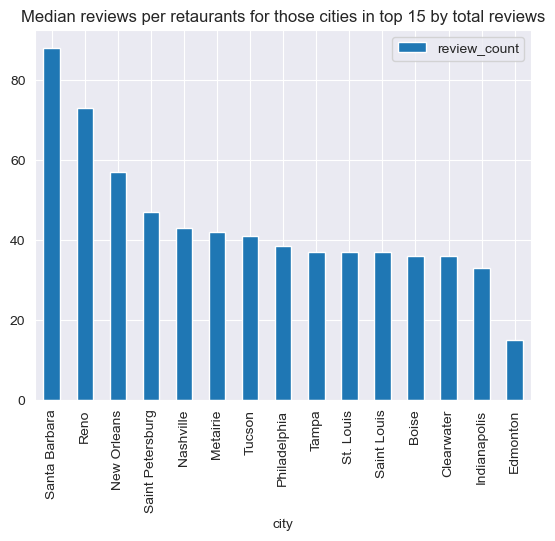

In [19]:
### Top review counts per restaurant
top_avg_reviews = restaurants_df.groupby("city", as_index=False)["review_count"].median().sort_values("review_count", ascending = False)
top_avg_reviews.loc[top_avg_reviews["city"].isin(top_reviews.index.values)].plot.bar(x = "city", y = "review_count")
plt.title("Median reviews per retaurants for those cities in top 15 by total reviews")

Finalize our candidate cities:

In [20]:
## For simplicity, we choose the top 5 cities by review counts
top_reviews.iloc[:10]

,review_count
city,
Philadelphia,665732
New Orleans,465982
Nashville,318548
Tampa,293122
Indianapolis,242024
Tucson,238851
Reno,191003
Saint Louis,171777
Santa Barbara,158247


In [21]:
## we keep the top candidate cities that have high median reviews per restaurant
candidates = top_avg_reviews.loc[top_avg_reviews["city"].isin(top_reviews.iloc[:10].index.values)]
print("Avg reviews per restaurant:")
print(candidates)

Avg reviews per restaurant:
              city  review_count
667  Santa Barbara          88.0
619           Reno          73.0
515    New Orleans          57.0
508      Nashville          43.0
801         Tucson          41.0
577   Philadelphia          38.5
761          Tampa          37.0
655    Saint Louis          37.0
63           Boise          36.0
344   Indianapolis          33.0


In [22]:
df_res_business = restaurants_df[restaurants_df["city"].isin(candidates["city"])]
df_res_business.to_csv("datasets/business_data_subset.csv", index = None)

In [23]:
df_res_business.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."


In [24]:
df_res_bus = pd.read_csv("datasets/business_data_subset.csv", index_col= None)
df_res_bus_ids = df_res_bus.business_id.unique()
df_res_bus.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207.0,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227.0,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
3,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
4,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."


(23591, 14)
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'number of restaurants')

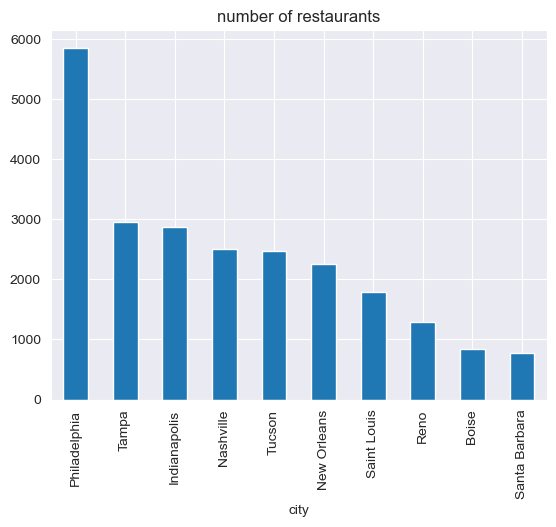

In [25]:
print(df_res_bus.shape)
print(df_res_bus.groupby(["city"])["business_id"].size().sort_values(ascending = False).plot.bar())
plt.title("number of restaurants")

********************************************************************************
Total Reviews:
AxesSubplot(0.125,0.11;0.775x0.77)
********************************************************************************
Reviews per restaurant:


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Santa Barbara,767.0,206.319426,336.432949,5.0,28.0,88.0,248.5,3834.0
Reno,1286.0,148.524883,209.178818,5.0,25.0,73.0,186.0,2506.0
New Orleans,2259.0,206.277999,491.353009,5.0,18.0,57.0,191.5,7568.0
Nashville,2502.0,127.317346,281.378346,5.0,16.0,43.0,126.0,6093.0
Tucson,2466.0,96.857664,149.520555,5.0,15.0,41.0,113.0,2126.0
Philadelphia,5852.0,113.761449,241.378560,5.0,14.0,38.5,114.0,5721.0
Saint Louis,1790.0,95.964804,180.282433,5.0,14.0,37.0,104.0,3999.0
Tampa,2960.0,99.027703,189.282634,5.0,15.0,37.0,109.0,3260.0
Boise,847.0,75.992916,122.858266,5.0,14.0,36.0,93.0,1810.0


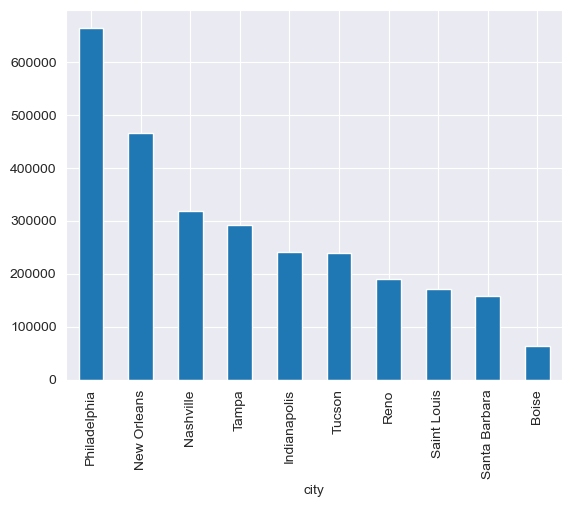

In [26]:
print("*"*80)
print("Total Reviews:")
print(df_res_bus.groupby(["city"])["review_count"].agg(sum).sort_values(ascending = False).plot.bar())
print("*"*80)
print("Reviews per restaurant:")
df_res_bus.groupby(["city"])["review_count"].describe().sort_values("50%", ascending = False) 

Review Data


In [28]:
## Review data for restaurants
## This will take a long time

review_data_samp = []
count = 0
count_cap = 1e9

with open("datasets/yelp_academic_dataset_review.json", 'r', encoding='utf-8') as f:
    for line in f:
        if json.loads(line)["business_id"] in df_res_bus_ids:
            review_data_samp.append(json.loads(line))
        count+= 1
        if count > count_cap:
            break
review_df_samp = pd.DataFrame.from_dict(review_data_samp)
review_df_samp.to_csv("datasets/reviews_data_subset.csv", index=None)

In [29]:
reviews_df = pd.read_csv("datasets/reviews_data_subset.csv")
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
3,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
4,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [30]:
df_merge = pd.merge(reviews_df, df_res_bus[['city','categories', 'business_id',"review_count"]], how = "outer", on ="business_id")
df_merge.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city,categories,review_count
0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Tucson,"Restaurants, Breakfast & Brunch",47
1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2.0,1,0,0,Let me start by saying the service is AWESOME!...,2015-09-10 02:41:13,Tucson,"Restaurants, Breakfast & Brunch",47
2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5.0,0,0,0,Went here for the first time for the dinner bu...,2017-08-18 01:42:46,Tucson,"Restaurants, Breakfast & Brunch",47
3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5.0,0,0,0,This is my 1st experience here at Kettle. The...,2015-09-26 16:13:09,Tucson,"Restaurants, Breakfast & Brunch",47
4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3.0,3,0,0,"Located on the west side of Starr Pass Blvd, K...",2015-06-22 16:08:27,Tucson,"Restaurants, Breakfast & Brunch",47


In [31]:
df_merge.dropna(inplace=True)

In [32]:
df_merge.city.unique()

array(['Tucson', 'Philadelphia', 'New Orleans', 'Santa Barbara',
       'Indianapolis', 'Tampa', 'Saint Louis', 'Nashville', 'Reno',
       'Boise'], dtype=object)

In [33]:
x = df_merge.groupby(["city","user_id"]).size().reset_index()
print("users' reviews summary statistics")
x.groupby("city").describe()

users' reviews summary statistics


0                                                
                  count      mean        std  min  25%  50%  75%    max
city                                                                   
Boise           29056.0  2.292883   4.761009  1.0  1.0  1.0  2.0  164.0
Indianapolis    77467.0  3.234655   9.646812  1.0  1.0  1.0  2.0  541.0
Nashville      139681.0  2.331928   5.753778  1.0  1.0  1.0  2.0  408.0
New Orleans    201798.0  2.360881   5.944015  1.0  1.0  1.0  2.0  727.0
Philadelphia   209513.0  3.280412  10.296483  1.0  1.0  1.0  2.0  929.0
Reno            76106.0  2.633616   7.571203  1.0  1.0  1.0  2.0  574.0
Saint Louis     69849.0  2.554825   7.335799  1.0  1.0  1.0  2.0  527.0
Santa Barbara   88072.0  1.842617   3.396951  1.0  1.0  1.0  2.0  203.0
Tampa          114328.0  2.652299   8.320370  1.0  1.0  1.0  2.0  666.0
Tucson          81341.0  3.068416   8.460414  1.0  1.0  1.0  2.0  385.0

Text(0.5, 1.0, 'Average reviews per User')

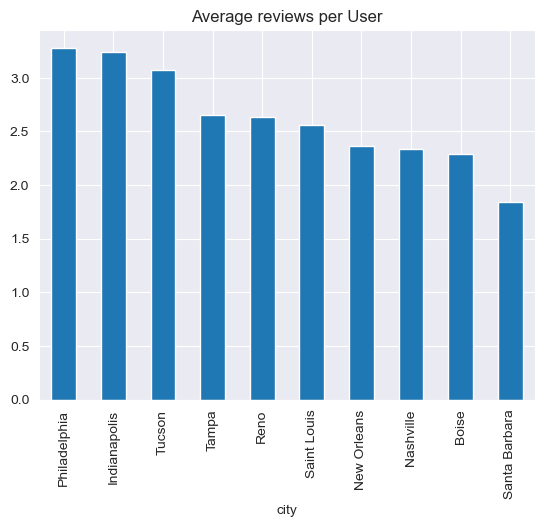

In [34]:
x.groupby("city").describe()[(0, "mean")].sort_values(ascending = False).plot.bar()
plt.title("Average reviews per User")

In [35]:
x.head()

,city,user_id,0
0,Boise,--CIuK7sUpaNzalLAlHJKA,1
1,Boise,--JfSCDuT5nsXCosHl5-IA,2
2,Boise,--fI82oM61KktdQXK-yllQ,6
3,Boise,--xbI3sn_YTnZ1hgVgqbKA,1
4,Boise,-02Negv0pEk7a2YqhplIUA,1


User Data

In [36]:
## get a list of user ids that had reviews for our candidate cities
users_ids_subset = x.user_id.unique().tolist()

In [ ]:
#user_data_samp = []

#with open("datasets/yelp_academic_dataset_user.json", 'r', encoding='utf-8') as f:
    #for line in f:
     #   if json.loads(line)["user_id"] in users_ids_subset:
      #      user_data_samp.append(json.loads(line))

#user_data_samp = pd.DataFrame.from_dict(user_data_samp)
#user_data_samp.to_csv("datasets/user_df.csv", index=None)

In [ ]:
# Initialize an empty DataFrame to store the data
all_data = pd.DataFrame()

# Define the file path
file_path = 'datasets/yelp_academic_dataset_business.json'

# Specify the chunk size
chunksize = 100000

# Read the file in chunks and concatenate them
for chunk in pd.read_json(file_path, lines=True, chunksize=chunksize):
    all_data = pd.concat([all_data, chunk])

all_data_re=all_data

# Now, 'all_data' contains the entire dataset

In [ ]:
type(all_data_re)

In [ ]:
all_data_re.head()